In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("datasets/hotel_bookings.csv")

In [8]:
city = data[data.hotel == "City Hotel"]
num_of_rows = len(city.index)

In [16]:
# Customer/Market Segmentation

In [165]:
#Identifying the number of each occuring Customer type
adults = city["adults"].sum()
children = city["children"].sum()
babies = city["babies"].sum()
#Average customer constellation per Booking
avg_cust = (adults/num_of_rows, children/num_of_rows, babies/num_of_rows)
#Percentage of Group Bookings
per_of_groups = len(city[city["customer_type"] == "Group"].index)/num_of_rows
#Percentage of Transient Bookings
per_of_transients = len(city[city["customer_type"] == "Transient"].index)/num_of_rows
#Percentage of normal Contract Bookings
per_of_contracts = len(city[city["customer_type"] == "Contract"].index)/num_of_rows

#Group By Country
countries = city.groupby("country")
country_list = list(zip(countries_unique, countries_size))
rev_countries = sorted(country_list, key = lambda x: x[1])[::-1]
topten_countries_list = rev_countries[0:10]
unzipped_countries_list = [[ i for i, j in topten_countries_list ], 
       [ j for i, j in topten_countries_list ]]
(topten_countries_names, topten_countries_sizes) = (unzipped_countries_list[0], unzipped_countries_list[1])

#Extracting the names from the array objects
def extract_names(names):
    res = []
    for e in names:
        res = res + e.tolist()
    return res

topten_countries_names = extract_names(topten_countries_names)

[Text(0.5, 1.0, 'Top 10 occuring Countries')]

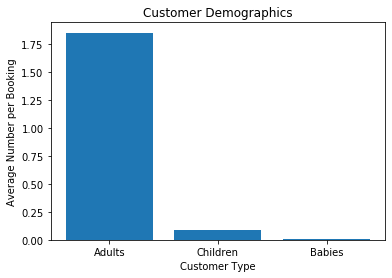

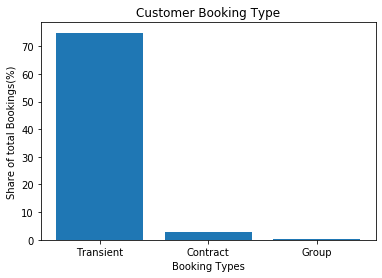

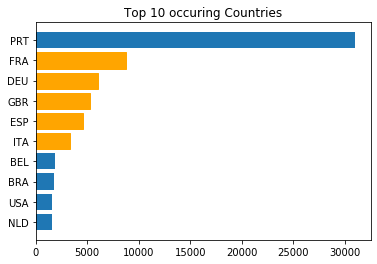

In [189]:
# Plotting Segmentations
fig, ax = plt.subplots()
ax.bar(["Adults", "Children", "Babies"],avg_cust)
ax.set(ylabel = "Average Number per Booking", xlabel = "Customer Type", title = "Customer Demographics")

fig2, ax2 = plt.subplots()
ax2.bar(["Transient", "Contract", "Group"],[per_of_transients*100, per_of_contracts*100, per_of_groups*100])
ax2.set(ylabel = "Share of total Bookings(%)", xlabel = "Booking Types", title = "Customer Booking Type")

#Country Bar Chart
fig3, ax3 = plt.subplots()
ax3.barh(topten_countries_names[::-1], topten_countries_sizes[::-1])

for i in range(8,3,-1):
    ax3.get_children()[i].set_color('orange')
    
ax3.set(title = "Top 10 occuring Countries")

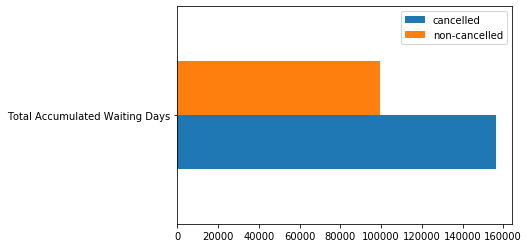

In [181]:
#Identify Cancellation Rate and analyzing potential Reasons
cancelations = city[city["is_canceled"] == 1]
non_cancels = city[city["is_canceled"] == 0]
cancel_rate = len(cancelations.index)/num_of_rows

#Potential Reason: Too much waiting time until confirmation
wait_cancel = cancelations["days_in_waiting_list"].sum()
wait_non_cancel = non_cancels["days_in_waiting_list"].sum()

waiting_days_df = pd.DataFrame({
    "cancelled": wait_cancel,
    "non-cancelled": wait_non_cancel
}, index = ["Total Accumulated Waiting Days"])

ax4 = waiting_days_df.plot.barh()

#Potential Reason2: Different Room assignment than the one reserved